<a href="https://colab.research.google.com/github/elmedianikhadija/pfe_prophet/blob/main/prophet_fin3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import datetime as dt

In [93]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
#libraries
import pandas as pd # manupilate the data

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

import folium 
from folium import plugins

In [95]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
from prophet import Prophet

In [97]:
!pip install pandas
!pip install numpy
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [99]:
Confirmed_df = pd.read_csv("/content/infected5.csv") 

Confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110


In [100]:
Confirmed_df=Confirmed_df.drop(columns=['Lat', 'Long', 'Province/State'])
Confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,140602,141499,142414,142762,143183,143439,143666,143871,144285,145008
1,Albania,0,0,0,0,0,0,0,0,0,...,132686,132697,132740,132763,132797,132828,132853,132875,132891,132922
2,Algeria,0,0,0,0,0,0,0,0,0,...,153309,154486,155784,157005,158213,159563,160868,162155,163660,165204
3,Andorra,0,0,0,0,0,0,0,0,0,...,14273,14359,14379,14379,14464,14498,14498,14498,14577,14586
4,Angola,0,0,0,0,0,0,0,0,0,...,40805,40906,41061,41227,41405,41629,41736,41780,41879,42110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,315641,315761,315761,315876,315876,315968,315968,316088,316088,316189
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,Yemen,0,0,0,0,0,0,0,0,0,...,6981,6987,6992,6997,7001,7003,7008,7012,7012,7022
282,Zambia,0,0,0,0,0,0,0,0,0,...,185649,186279,187602,188573,189731,190615,191527,192071,192316,192956


In [101]:
Confirmed_df = Confirmed_df.groupby(by='Country/Region').aggregate(np.sum).T
Confirmed_df

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/23/21,143439,132828,159563,14498,41629,0,1277,4827973,228382,32753,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
7/24/21,143666,132853,160868,14498,41736,0,1280,4839109,228632,32918,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
7/25/21,143871,132875,162155,14498,41780,0,1280,4846615,228798,33082,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
7/26/21,144285,132891,163660,14577,41879,0,1280,4859170,228910,33266,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [102]:
#Confirmed_df.to_csv("infected_df_Morocco.csv", index=False)

In [103]:
Confirmed_df.index.name = 'Date'
Confirmed_df =Confirmed_df.reset_index()

In [104]:
Confirmed_df.tail(1000)

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,7/23/21,143439,132828,159563,14498,41629,0,1277,4827973,228382,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
549,7/24/21,143666,132853,160868,14498,41736,0,1280,4839109,228632,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
550,7/25/21,143871,132875,162155,14498,41780,0,1280,4846615,228798,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
551,7/26/21,144285,132891,163660,14577,41879,0,1280,4859170,228910,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [105]:
#Confirmed_df.to_csv("infected_df2_Morocco.csv", index=False)

In [106]:
Confirmed_df["Date"] = pd.to_datetime(Confirmed_df['Date'], dayfirst=True)
Confirmed_df["Date"].dtype

dtype('<M8[ns]')

In [107]:
Confirmed_df.head(1000)

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,2021-07-23,143439,132828,159563,14498,41629,0,1277,4827973,228382,...,380151,122786,4,296863,86957,315968,0,7003,190615,95686
549,2021-07-24,143666,132853,160868,14498,41736,0,1280,4839109,228632,...,380311,123559,4,298804,94913,315968,0,7008,191527,97277
550,2021-07-25,143871,132875,162155,14498,41780,0,1280,4846615,228798,...,380431,124290,4,299822,101173,316088,0,7012,192071,97894
551,2021-07-26,144285,132891,163660,14577,41879,0,1280,4859170,228910,...,380584,124995,4,300919,106347,316088,0,7012,192316,99944


In [108]:
#Confirmed_df.to_csv("infected_df3_Morocco.csv", index=False)

# Prophet Morocco

In [109]:
#mycolumns_Morocco = ['Date','Morocco'] 

In [110]:
#infected_Morocco = Confirmed_df[mycolumns_Morocco]

In [111]:
#infected_Morocco

In [112]:
#infected_Morocco['Date'] = pd.to_datetime(infected_Morocco['Date'])
#infected_Morocco.columns = ['ds', 'y']

In [113]:
#infected_Morocco

In [114]:
#infected_Morocco.to_csv("infected_MoroccoDS.csv", index=False)

In [115]:
infected_MoroccoFIN = pd.read_csv("/content/MOROCCO_infected.csv") 
infected_MoroccoFIN = infected_MoroccoFIN[0:522]

In [171]:
infected_MoroccoFIN.tail()

,ds,y
517,2021-06-22,527174
518,2021-06-23,527696
519,2021-06-24,528180
520,2021-06-25,528731
521,2021-06-26,529224


In [117]:
model_Morocco	 = Prophet()
model_Morocco	.fit(infected_MoroccoFIN)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/ul2mozcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/f2fb8hmy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1360', 'data', 'file=/tmp/tmpr1ojl07m/ul2mozcu.json', 'init=/tmp/tmpr1ojl07m/f2fb8hmy.json', 'output', 'file=/tmp/tmpexdrfrfq/prophet_model-20220906151829.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [118]:
future_Morocco	 = model_Morocco	.make_future_dataframe(periods=30)
forecast_Morocco	 = model_Morocco	.predict(future_Morocco)

In [172]:
forecast_Morocco[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
573,2021-08-21,551170.812598,517809.038676,585981.670986
574,2021-08-22,551433.681139,517387.249658,586549.705248
575,2021-08-23,551196.834247,515787.964714,588359.590254
576,2021-08-24,551600.291403,515237.165744,589448.609485
577,2021-08-25,552154.986430,515719.435480,591096.182009


In [120]:
#forecast_Morocco.to_csv("forecast_Morocco_Morocco.csv", index=False)

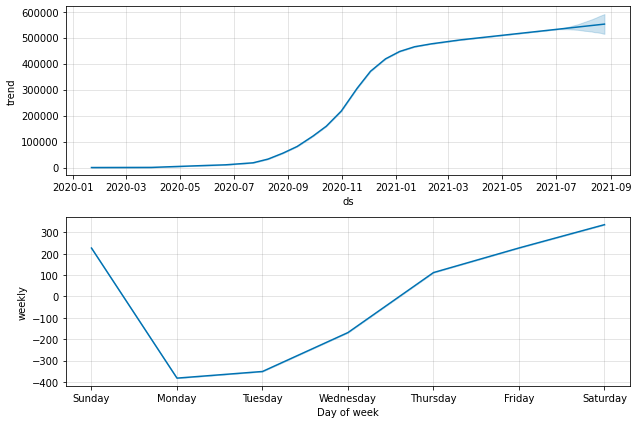

In [121]:
confirmed_forecast_plot = model_Morocco.plot_components(forecast_Morocco)

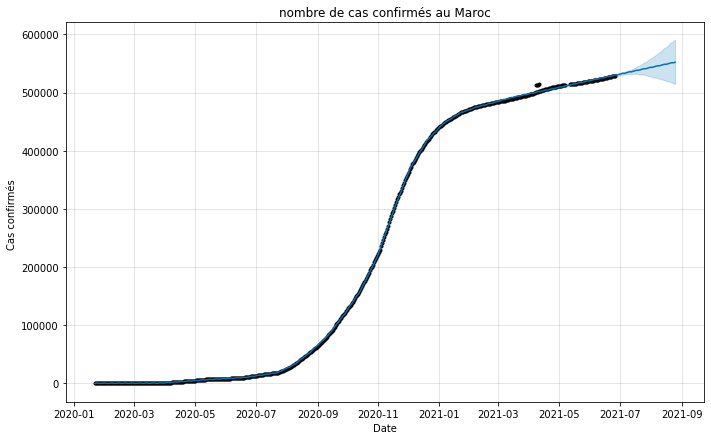

In [122]:
fig = model_Morocco.plot(forecast_Morocco, xlabel='Date', ylabel='Cas confirmés ')
plt.title('nombre de cas confirmés au Maroc')
plt.show()

In [123]:
predicted_be =  forecast_Morocco['yhat_lower'][len(forecast_Morocco['yhat_lower'])-1]
expected_be = Confirmed_df['Morocco'][len(Confirmed_df['Morocco'])-2]
residual_error_be = expected_be - predicted_be
int(residual_error_be)

65757

In [124]:
#forecast_Morocco.to_csv("forecast_Morocco.csv", index=False)

In [125]:
#infected_MoroccoFIN2 = pd.read_csv("/content/MOROCCO_infected.csv") 

In [126]:
#infected_MoroccoFIN2

In [127]:
#infected_MoroccoFIN2 = infected_MoroccoFIN2[0:537]

In [128]:
#infected_MoroccoFIN2

In [129]:
#mb = Prophet(interval_width=0.80)
#mb.fit(infected_MoroccoFIN2)
#infected_MoroccoFIN2future = mb.make_future_dataframe(periods=15)
#infected_MoroccoFIN2future

In [130]:
#forecast = mb.predict(infected_MoroccoFIN2future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(1000)

# Prophet Algeria

In [131]:
#mycolumns_Algeria = ['Date','Algeria'] 

In [132]:
#infected_Algeria = Confirmed_df[mycolumns_Algeria]

In [133]:
#infected_Algeria

In [134]:
#infected_Algeria['Date'] = pd.to_datetime(infected_Algeria['Date'])
#infected_Algeria.columns = ['ds', 'y']

In [135]:
#infected_Algeria

In [136]:
#infected_Algeria.to_csv("infected_Algeria_ds.csv", index=False)

In [137]:
infected_Algeria = pd.read_csv("/content/infected_AlgeriaFIN.csv") 
infected_Algeria = infected_Algeria[0:522]


In [138]:
infected_Algeria

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
517,2021-06-22,136679
518,2021-06-23,137049
519,2021-06-24,137403
520,2021-06-25,137772


In [139]:
model_Algeria = Prophet()
model_Algeria.fit(infected_Algeria)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/dac0ouqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/mn_y7teb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28416', 'data', 'file=/tmp/tmpr1ojl07m/dac0ouqy.json', 'init=/tmp/tmpr1ojl07m/mn_y7teb.json', 'output', 'file=/tmp/tmp2odsscnw/prophet_model-20220906151833.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [140]:
future_Algeria = model_Algeria.make_future_dataframe(periods=30)
forecast_Algeria = model_Algeria.predict(future_Algeria)

In [173]:
forecast_Algeria[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
547,2021-07-22,140373.569924,138173.236384,142785.186462
548,2021-07-23,140600.448857,138135.320627,143437.684544
549,2021-07-24,140810.222769,138277.275611,143810.740926
550,2021-07-25,140966.265553,138228.715717,144212.398695
551,2021-07-26,141170.049562,138202.261160,144482.544756


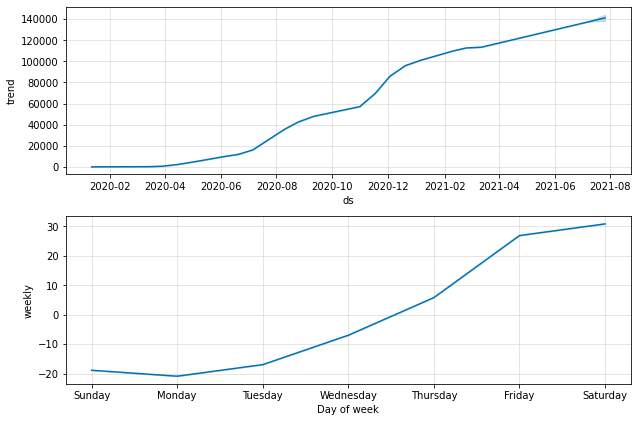

In [142]:
confirmed_forecast_plot = model_Algeria.plot_components(forecast_Algeria)

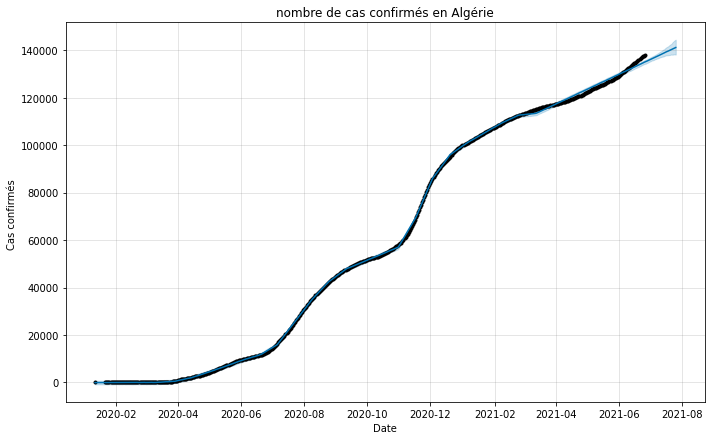

In [143]:
fig = model_Algeria.plot(forecast_Algeria, xlabel='Date', ylabel='Cas confirmés ')
plt.title('nombre de cas confirmés en Algérie')
plt.show()

In [144]:
predicted_be_a =  forecast_Algeria['yhat_lower'][len(forecast_Algeria['yhat_lower'])-1]
expected_be_a = Confirmed_df['Morocco'][len(Confirmed_df['Morocco'])-2]
residual_error_be_a = expected_be_a - predicted_be_a
int(residual_error_be_a)

443274

# Prophet Egypt

In [145]:
#mycolumns_Egypt	 = ['Date','Egypt'] 

In [146]:
#infected_Egypt	 = Confirmed_df[mycolumns_Egypt	]

In [147]:
#infected_Egypt

In [148]:
#infected_Egypt	['Date'] = pd.to_datetime(infected_Egypt	['Date'])
#infected_Egypt	.columns = ['ds', 'y']

In [149]:
#infected_Egypt

In [150]:
#infected_Egypt.to_csv("infected_Egypt.csv", index=False)

In [151]:
infected_Egypt = pd.read_csv("/content/infected_EgyptFIN.csv") 
infected_Egypt = infected_Egypt[0:522]
infected_Egypt 

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
517,2021-06-22,278295
518,2021-06-23,278761
519,2021-06-24,279184
520,2021-06-25,279596


In [152]:
model_Egypt	 = Prophet()
model_Egypt	.fit(infected_Egypt)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/w0u1aqac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/npxu85a_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4203', 'data', 'file=/tmp/tmpr1ojl07m/w0u1aqac.json', 'init=/tmp/tmpr1ojl07m/npxu85a_.json', 'output', 'file=/tmp/tmp4trcc61u/prophet_model-20220906151838.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [153]:
future_Egypt		 = model_Egypt		.make_future_dataframe(periods=30)
forecast_Egypt		 = model_Egypt		.predict(future_Egypt	)

In [174]:
forecast_Egypt[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
547,2021-07-22,307383.521314,302479.963220,311933.811819
548,2021-07-23,308314.100223,302893.384300,313257.444835
549,2021-07-24,309236.935035,303963.106334,314433.477923
550,2021-07-25,310199.246509,304105.388852,315512.916235
551,2021-07-26,311105.007863,304523.118658,316764.430202


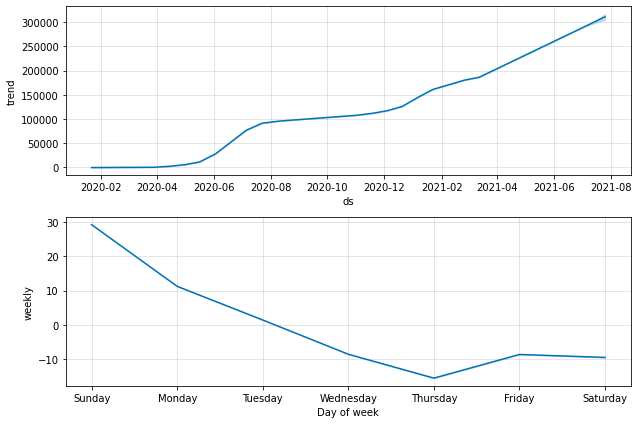

In [155]:
confirmed_forecast_plot = model_Egypt.plot_components(forecast_Egypt)

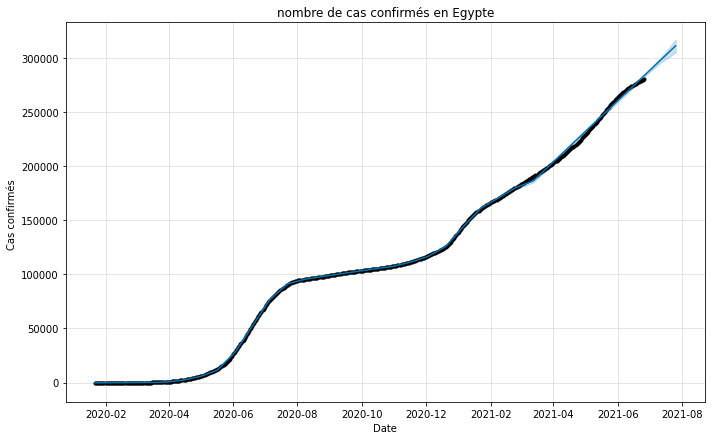

In [156]:
fig = model_Egypt.plot(forecast_Egypt, xlabel='Date', ylabel='Cas confirmés ')
plt.title('nombre de cas confirmés en Egypte')
plt.show()

In [157]:
predicted_be_b =  forecast_Egypt['yhat_lower'][len(forecast_Egypt['yhat_lower'])-1]
expected_be_b = Confirmed_df['Morocco'][len(Confirmed_df['Morocco'])-2]
residual_error_be_b = expected_be_b - predicted_be_b
int(residual_error_be_b)

276953

# Prophet Libya

In [158]:
#mycolumns_Libya	 = ['Date','Libya']

In [159]:
#infected_Libya	 = Confirmed_df[mycolumns_Libya]

In [160]:
#infected_Libya

In [161]:
#infected_Libya	['Date'] = pd.to_datetime(infected_Libya	['Date'])
#infected_Libya	.columns = ['ds', 'y']

In [162]:
#infected_Libya

In [163]:
#infected_Libya.to_csv("infected_Libya.csv", index=False)

In [164]:
infected_Libya = pd.read_csv("/content/infected_LibyaFIN.csv") 
infected_Libya = infected_Libya[0:522]
infected_Libya 

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
517,2021-06-22,191253
518,2021-06-23,191476
519,2021-06-24,191660
520,2021-06-25,192129


In [165]:
model_Libya	 = Prophet()
model_Libya.fit(infected_Libya)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/ijy0bnz8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr1ojl07m/g4c8guws.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84840', 'data', 'file=/tmp/tmpr1ojl07m/ijy0bnz8.json', 'init=/tmp/tmpr1ojl07m/g4c8guws.json', 'output', 'file=/tmp/tmpqntenkdi/prophet_model-20220906151844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [166]:
future_Libya	 = model_Libya.make_future_dataframe(periods=30)
forecast_Libya	 = model_Libya.predict(future_Libya)

In [175]:
forecast_Libya[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
547,2021-07-22,210298.062025,207218.868253,213209.168094
548,2021-07-23,210781.626756,207482.680536,214010.837381
549,2021-07-24,210946.387169,207759.415326,214392.200720
550,2021-07-25,211583.984549,208377.553926,214857.270828
551,2021-07-26,212092.282446,208773.005423,215836.463360


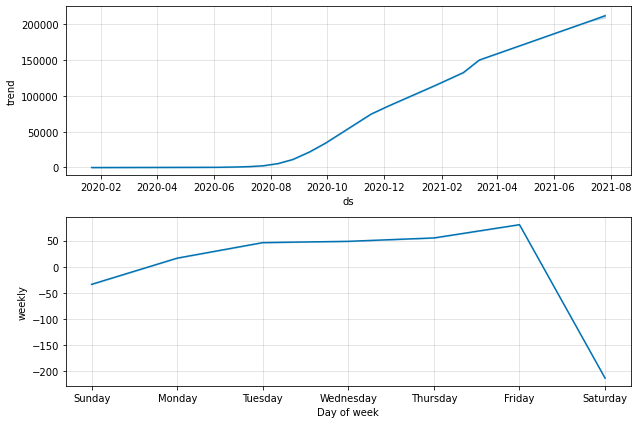

In [168]:
confirmed_forecast_plot = model_Libya.plot_components(forecast_Libya)

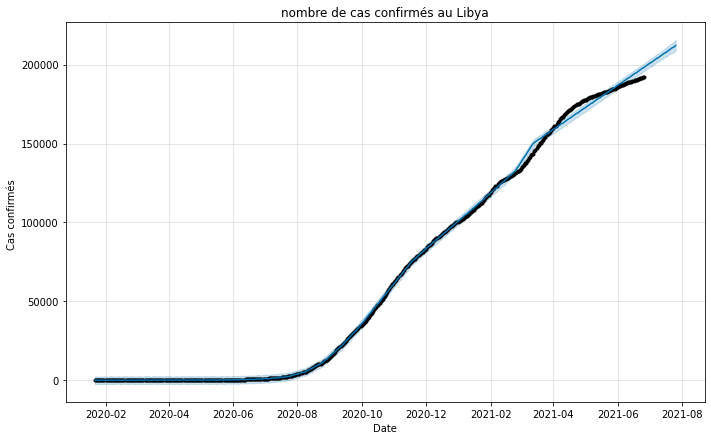

In [169]:
fig = model_Libya.plot(forecast_Libya, xlabel='Date', ylabel='Cas confirmés ')
plt.title('nombre de cas confirmés au Libya')
plt.show()

In [170]:
predicted_be_c =  forecast_Libya['yhat_lower'][len(forecast_Libya['yhat_lower'])-1]
expected_be_c = Confirmed_df['Morocco'][len(Confirmed_df['Morocco'])-2]
residual_error_be_c = expected_be_c - predicted_be_c
int(residual_error_be_c)

372703